# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [ ]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [ ]:
X = boston.data
y = boston.target

# 3. Train test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3)

# 4. Simple Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
lr.score(xtrain,ytrain)

0.7259667385823223

In [ ]:
lr.score(xtest,ytest)

0.7551393317432868

# 5. Ridge Regularization for Linear Model

In [ ]:
from sklearn.linear_model import Ridge
modelr = Ridge(alpha = 100)
modelr.fit(xtrain,ytrain)
modelr.score(xtrain,ytrain)

0.6998699548472032

In [ ]:
modelr.score(xtest,ytest)

0.7179883093690711

# 6. Lasso Regularization for Linear Model

In [ ]:
from sklearn.linear_model import Lasso
modell = Lasso(alpha =0.1)
modell.fit(xtrain,ytrain)
modell.score(xtrain,ytrain)

0.7090528273810086

In [ ]:
modell.score(xtest,ytest)

0.7460949121111651

# 7. Polynomial Regression of degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)# creating object with parameter 2
xtrain_poly = pf.fit_transform(xtrain)
xtest_poly = pf.fit_transform(xtest)

In [ ]:
lrp = LinearRegression()
lrp.fit(xtrain_poly,ytrain)
lrp.score(xtrain_poly,ytrain)

0.9255416875142503

In [ ]:
lrp.score(xtest_poly,ytest)

0.8374725085116838

# 8. Ridge Regularization for Polynomial model

In [ ]:
modelrp = Ridge(alpha = 10000)
modelrp.fit(xtrain_poly,ytrain)
modelrp.score(xtrain_poly,ytrain)

0.8780721517471385

In [ ]:
modelrp.score(xtest_poly,ytest)

0.8226036182724279

# 9. Lasso Regularization for Polynomial model

In [ ]:
modelrpl = Lasso(alpha = 1)
modelrpl.fit(xtrain_poly,ytrain)
modelrpl.score(xtrain_poly,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.062e+03, tolerance: 2.941e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8736354254990634

In [ ]:
modelrpl.score(xtest_poly,ytest)

0.8013956351573207

# 10. Select K Best

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func = f_regression, k = 7)
x_selected = kb.fit_transform(xtrain,ytrain)
x_selected.shape

(354, 7)

In [ ]:
lrk = LinearRegression()
lrk.fit(x_selected,ytrain)
lrk.score(x_selected,ytrain)

0.6521164409834519

In [ ]:
tdf = pd.DataFrame

In [ ]:
traindf = pd.DataFrame(data = xtrain, columns = boston.feature_names)
traindf['target']= ytrain
traindf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE      DIS  RAD    TAX  \
0  0.04301  80.0   1.91   0.0  0.413  5.663   21.9  10.5857  4.0  334.0   
1  2.30040   0.0  19.58   0.0  0.605  6.319   96.1   2.1000  5.0  403.0   
2  0.09252  30.0   4.93   0.0  0.428  6.606   42.2   6.1899  6.0  300.0   
3  1.12658   0.0  19.58   1.0  0.871  5.012   88.0   1.6102  5.0  403.0   
4  1.62864   0.0  21.89   0.0  0.624  5.019  100.0   1.4394  4.0  437.0   

   PTRATIO       B  LSTAT  target  
0     22.0  382.80   8.05    18.2  
1     14.7  297.09  11.10    23.8  
2     16.6  383.78   7.37    23.3  
3     14.7  343.28  12.12    15.3  
4     21.2  396.90  34.41    14.4

In [ ]:
corr = traindf.corr()

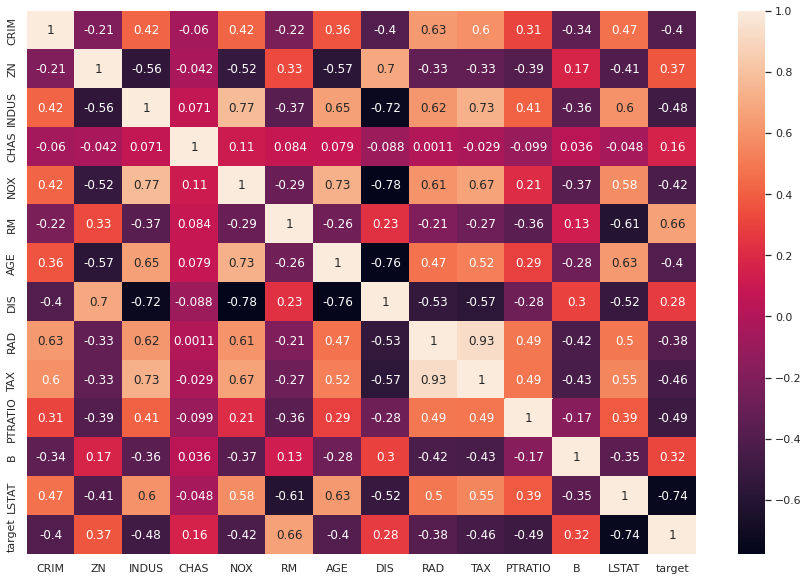

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

In [ ]:
selected_columns = ['CRIM','INDUS','NOX', 'RM','TAX','PTRATIO','LSTAT']

In [ ]:
train_selected = traindf[selected_columns]
test_selected = tdf[selected_columns]
test_selected.head()

In [ ]:
test_selected = traindf[selected_columns]
test_selected.head()

CRIM  INDUS    NOX     RM    TAX  PTRATIO  LSTAT
0  0.04301   1.91  0.413  5.663  334.0     22.0   8.05
1  2.30040  19.58  0.605  6.319  403.0     14.7  11.10
2  0.09252   4.93  0.428  6.606  300.0     16.6   7.37
3  1.12658  19.58  0.871  5.012  403.0     14.7  12.12
4  1.62864  21.89  0.624  5.019  437.0     21.2  34.41

In [ ]:
kmodel = LinearRegression()
kmodel.fit(train_selected,ytrain)
kmodel.score(train_selected,ytrain)

0.6521164409834519

# 11. Conclusion

Learing Regularization, I came to know that Ridge is used to handle the overfitting data where as Lasso is used for a more accurate prediction.

If you have many features with high correlation and you need to take away the useless features then LASSO is the better solution. If the number of features greater than the number of observations and many features with multi-collinearity, Ridge regularization is a better solution